In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest
from sklearn.preprocessing import PowerTransformer


In [2]:
Scales = pd.read_csv('SCALES.csv', sep=',', header=0)
#display(Scales)

In [3]:
##### searching for missing values #####
pd.set_option('display.max_rows', None)
print(Scales.isna().sum())


ID                     0
Gender                 3
Pain_Opioids           0
Other_Opioids          0
Codeine                0
Cocaine                0
Cocaine_AlkMix         0
Amphetamine            0
Methamphetamine        0
Ecstasy                0
other_Psychoactives    0
Ketamine               0
ADHD_Treat             0
Epi_Treat              0
Antihistamine          0
Cannabis               0
Antidepressant         1
Paracetamol            1
Benzodiatephine        0
Seditativa             0
Levamisol              0
Drug cons              0
Meds cons              1
TC_PROBLEM01           3
TC2.2_PROBLEM01        3
TC3.1_PROBLEM01        3
TC4.1_PROBLEM01        3
TC4.2_PROBLEM01        3
TC4.3_PROBLEM01        3
TC5.1_PROBLEM01        3
TC6.1_PROBLEM01        3
TC7.1_PROBLEM01        3
TC_PROBLEM02           3
TC2.2_PROBLEM02        3
TC3.1_PROBLEM02        3
TC4.1_PROBLEM02        3
TC4.2_PROBLEM02        3
TC4.3_PROBLEM02        3
TC5.1_PROBLEM02        3
TC6.1_PROBLEM02        3


In [4]:
### Sum up some Variables

Scales['Opioids']=Scales['Pain_Opioids']+Scales['Other_Opioids']+Scales['Codeine']
Scales['Ecstasy']=Scales['other_Psychoactives']+Scales['Ecstasy']

#### dropping missing values #####
### Drop.NA in al Problems
Scales = Scales.dropna(subset = ['TC_PROBLEM01', 'TC2.2_PROBLEM01', 'TC3.1_PROBLEM01', 'TC4.1_PROBLEM01', 'TC4.2_PROBLEM01', 'TC4.3_PROBLEM01', 'TC5.1_PROBLEM01', 'TC6.1_PROBLEM01', 'TC7.1_PROBLEM01', 
'TC_PROBLEM02', 'TC2.2_PROBLEM02', 'TC3.1_PROBLEM02', 'TC4.1_PROBLEM02', 'TC4.2_PROBLEM02', 'TC4.3_PROBLEM02', 'TC5.1_PROBLEM02', 'TC6.1_PROBLEM02', 'TC7.1_PROBLEM02',
'TC_PROBLEM03', 'TC2.2_PROBLEM03', 'TC3.1_PROBLEM03', 'TC4.1_PROBLEM03', 'TC4.2_PROBLEM03', 'TC4.3_PROBLEM03', 'TC5.1_PROBLEM03', 'TC6.1_PROBLEM03', 'TC7.1_PROBLEM03', 
'TC_PROBLEM04', 'TC2.2_PROBLEM04', 'TC3.1_PROBLEM04', 'TC4.1_PROBLEM04', 'TC4.2_PROBLEM04', 'TC4.3_PROBLEM04', 'TC5.1_PROBLEM04', 'TC6.1_PROBLEM04', 'TC7.1_PROBLEM04', 
'TC_PROBLEM05', 'TC2.2_PROBLEM05', 'TC3.1_PROBLEM05', 'TC4.1_PROBLEM05', 'TC4.2_PROBLEM05', 'TC4.3_PROBLEM05', 'TC5.1_PROBLEM05', 'TC6.1_PROBLEM05', 'TC7.1_PROBLEM05', 
'TC_PROBLEM06', 'TC2.2_PROBLEM06', 'TC3.1_PROBLEM06', 'TC4.1_PROBLEM06', 'TC4.2_PROBLEM06', 'TC4.3_PROBLEM06', 'TC5.1_PROBLEM06', 'TC6.1_PROBLEM06', 'TC7.1_PROBLEM06',
'TC_PROBLEM07', 'TC2.2_PROBLEM07', 'TC3.1_PROBLEM07', 'TC4.1_PROBLEM07', 'TC4.2_PROBLEM07', 'TC4.3_PROBLEM07', 'TC5.1_PROBLEM07', 'TC6.1_PROBLEM07', 'TC7.1_PROBLEM07'])
Scales.isna().sum()

ID                     0
Gender                 2
Pain_Opioids           0
Other_Opioids          0
Codeine                0
Cocaine                0
Cocaine_AlkMix         0
Amphetamine            0
Methamphetamine        0
Ecstasy                0
other_Psychoactives    0
Ketamine               0
ADHD_Treat             0
Epi_Treat              0
Antihistamine          0
Cannabis               0
Antidepressant         1
Paracetamol            1
Benzodiatephine        0
Seditativa             0
Levamisol              0
Drug cons              0
Meds cons              1
TC_PROBLEM01           0
TC2.2_PROBLEM01        0
TC3.1_PROBLEM01        0
TC4.1_PROBLEM01        0
TC4.2_PROBLEM01        0
TC4.3_PROBLEM01        0
TC5.1_PROBLEM01        0
TC6.1_PROBLEM01        0
TC7.1_PROBLEM01        0
TC_PROBLEM02           0
TC2.2_PROBLEM02        0
TC3.1_PROBLEM02        0
TC4.1_PROBLEM02        0
TC4.2_PROBLEM02        0
TC4.3_PROBLEM02        0
TC5.1_PROBLEM02        0
TC6.1_PROBLEM02        0


In [5]:
## Test Normaldistribution for all relevant substances
NScales = [Scales['Cocaine'],Scales['Amphetamine'],Scales['Methamphetamine'],Scales['Ecstasy'],Scales['Ketamine'],
            Scales['Cannabis'],Scales['Opioids']]
NScales_labels = ['Cocaine','Amphetamine','Methamphetamine','Ecstasy','Ketamine','Cannabis','Opioids'] 

i = 0
for NScales in NScales:
  k2, p = stats.normaltest(NScales) # D Agostino-Pearson
  print('%15s %1.2f ' % (NScales_labels[i],p))
  i+=1


        Cocaine 0.00 
    Amphetamine 0.00 
Methamphetamine 0.00 
        Ecstasy 0.00 
       Ketamine 0.00 
       Cannabis 0.00 
        Opioids 0.00 


In [18]:
### selecting all the relevant variables from scales ###
Scales = Scales[['Opioids', 'Cocaine', 'Amphetamine', 'Methamphetamine', 'Ecstasy',
                   'Ketamine', 'Cannabis', 'Antidepressant', 'Benzodiatephine', 'Seditativa',
                'TC_PROBLEM01', 'TC2.2_PROBLEM01', 'TC3.1_PROBLEM01', 'TC4.1_PROBLEM01', 'TC4.2_PROBLEM01', 'TC4.3_PROBLEM01', 'TC5.1_PROBLEM01', 'TC6.1_PROBLEM01', 'TC7.1_PROBLEM01', 
                'TC_PROBLEM02', 'TC2.2_PROBLEM02', 'TC3.1_PROBLEM02', 'TC4.1_PROBLEM02', 'TC4.2_PROBLEM02', 'TC4.3_PROBLEM02', 'TC5.1_PROBLEM02', 'TC6.1_PROBLEM02', 'TC7.1_PROBLEM02',
                'TC_PROBLEM03', 'TC2.2_PROBLEM03', 'TC3.1_PROBLEM03', 'TC4.1_PROBLEM03', 'TC4.2_PROBLEM03', 'TC4.3_PROBLEM03', 'TC5.1_PROBLEM03', 'TC6.1_PROBLEM03', 'TC7.1_PROBLEM03', 
                'TC_PROBLEM04', 'TC2.2_PROBLEM04', 'TC3.1_PROBLEM04', 'TC4.1_PROBLEM04', 'TC4.2_PROBLEM04', 'TC4.3_PROBLEM04', 'TC5.1_PROBLEM04', 'TC6.1_PROBLEM04', 'TC7.1_PROBLEM04', 
                'TC_PROBLEM05', 'TC2.2_PROBLEM05', 'TC3.1_PROBLEM05', 'TC4.1_PROBLEM05', 'TC4.2_PROBLEM05', 'TC4.3_PROBLEM05', 'TC5.1_PROBLEM05', 'TC6.1_PROBLEM05', 'TC7.1_PROBLEM05', 
                'TC_PROBLEM06', 'TC2.2_PROBLEM06', 'TC3.1_PROBLEM06', 'TC4.1_PROBLEM06', 'TC4.2_PROBLEM06', 'TC4.3_PROBLEM06', 'TC5.1_PROBLEM06', 'TC6.1_PROBLEM06', 'TC7.1_PROBLEM06',
                'TC_PROBLEM07', 'TC2.2_PROBLEM07', 'TC3.1_PROBLEM07', 'TC4.1_PROBLEM07', 'TC4.2_PROBLEM07', 'TC4.3_PROBLEM07', 'TC5.1_PROBLEM07', 'TC6.1_PROBLEM07', 'TC7.1_PROBLEM07']]

In [19]:
pd.set_option('display.max_rows', 20)
display(Scales)

,Opioids,Cocaine,Amphetamine,Methamphetamine,Ecstasy,Ketamine,Cannabis,Antidepressant,Benzodiatephine,Seditativa,...,TC7.1_PROBLEM06,TC_PROBLEM07,TC2.2_PROBLEM07,TC3.1_PROBLEM07,TC4.1_PROBLEM07,TC4.2_PROBLEM07,TC4.3_PROBLEM07,TC5.1_PROBLEM07,TC6.1_PROBLEM07,TC7.1_PROBLEM07
0,0.0,0.0,0,0,14600.0,0,240,0.0,0.0,0,...,1.50,1.0,3.00,3.000000,1.000000,1.0,3.00,2.5,2.0,2.0
1,65.0,0.0,0,0,0.0,0,0,0.0,0.0,0,...,1.25,1.5,1.75,2.000000,2.250000,2.5,2.75,3.0,2.0,2.0
2,19.0,145.0,0,0,0.0,0,0,0.0,0.0,0,...,2.00,2.0,2.00,2.000000,2.000000,1.0,2.00,3.0,4.0,2.0
3,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0,...,1.50,1.0,1.00,2.000000,1.000000,1.0,1.00,2.0,2.0,2.0
4,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0,...,3.00,3.0,1.00,5.000000,3.000000,2.0,2.00,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,40.0,0.0,0,0,0.0,0,0,0.0,0.0,0,...,2.00,1.0,1.00,2.000000,2.000000,3.0,4.00,1.0,2.0,2.0
999,0.0,0.0,0,0,0.0,0,16,0.0,0.0,0,...,1.00,4.0,3.00,4.000000,3.000000,4.0,2.00,2.0,3.0,1.0
1000,0.0,0.0,0,0,0.0,0,137,0.0,0.0,0,...,1.00,1.0,1.00,2.000000,1.000000,1.5,2.00,2.0,3.0,2.0
1001,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0,...,1.00,2.0,3.00,2.333333,1.666667,1.0,4.00,2.0,2.0,1.0


In [20]:
### selecting all Drugs out of Scales Dataframe in order to define the amount of co-consumption ###

Drugs = Scales[['Opioids', 'Cocaine', 'Amphetamine', 'Methamphetamine', 'Ecstasy',
       'Ketamine', 'Cannabis', 
                'Antidepressant', 'Benzodiatephine', 'Seditativa']]


In [15]:
pd.set_option('display.max_rows', 20)
Drugs

,Opioids,Cocaine,Amphetamine,Methamphetamine,Ecstasy,Ketamine,Cannabis,Antidepressant,Benzodiatephine,Seditativa
0,0.0,0.0,0,0,14600.0,0,240,0.0,0.0,0
1,65.0,0.0,0,0,0.0,0,0,0.0,0.0,0
2,19.0,145.0,0,0,0.0,0,0,0.0,0.0,0
3,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0
4,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
998,40.0,0.0,0,0,0.0,0,0,0.0,0.0,0
999,0.0,0.0,0,0,0.0,0,16,0.0,0.0,0
1000,0.0,0.0,0,0,0.0,0,137,0.0,0.0,0
1001,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0


In [16]:
### makes a list with row-index first and amount of co-consumed drugs ###
Drugs_dict = dict(list(Drugs.groupby(Drugs.index)))

for k, v in Drugs_dict.items():               # k: name of index, v: is a df
    check = v.columns[(v > 1).any()]
    if len(check) > 0:
     print("[",k,",",len(check),"]",",",end="")

[ 0 , 2 ] ,[ 1 , 1 ] ,[ 2 , 2 ] ,[ 8 , 1 ] ,[ 13 , 1 ] ,[ 17 , 2 ] ,[ 27 , 1 ] ,[ 28 , 2 ] ,[ 30 , 2 ] ,[ 34 , 2 ] ,[ 36 , 1 ] ,[ 38 , 1 ] ,[ 40 , 3 ] ,[ 42 , 1 ] ,[ 43 , 3 ] ,[ 45 , 2 ] ,[ 50 , 1 ] ,[ 53 , 3 ] ,[ 54 , 1 ] ,[ 56 , 1 ] ,[ 57 , 1 ] ,[ 58 , 1 ] ,[ 62 , 2 ] ,[ 63 , 3 ] ,[ 66 , 3 ] ,[ 67 , 1 ] ,[ 68 , 1 ] ,[ 69 , 1 ] ,[ 74 , 4 ] ,[ 75 , 1 ] ,[ 76 , 1 ] ,[ 77 , 1 ] ,[ 84 , 1 ] ,[ 85 , 5 ] ,[ 86 , 3 ] ,[ 90 , 1 ] ,[ 100 , 1 ] ,[ 103 , 1 ] ,[ 106 , 2 ] ,[ 112 , 1 ] ,[ 115 , 5 ] ,[ 117 , 3 ] ,[ 120 , 1 ] ,[ 124 , 3 ] ,[ 128 , 2 ] ,[ 129 , 1 ] ,[ 132 , 4 ] ,[ 134 , 6 ] ,[ 135 , 1 ] ,[ 137 , 1 ] ,[ 138 , 1 ] ,[ 143 , 3 ] ,[ 146 , 1 ] ,[ 154 , 1 ] ,[ 157 , 1 ] ,[ 158 , 1 ] ,[ 160 , 1 ] ,[ 161 , 1 ] ,[ 162 , 1 ] ,[ 165 , 3 ] ,[ 166 , 1 ] ,[ 169 , 1 ] ,[ 171 , 1 ] ,[ 172 , 1 ] ,[ 173 , 1 ] ,[ 174 , 1 ] ,[ 176 , 3 ] ,[ 181 , 2 ] ,[ 183 , 2 ] ,[ 185 , 1 ] ,[ 186 , 2 ] ,[ 188 , 2 ] ,[ 192 , 3 ] ,[ 193 , 1 ] ,[ 200 , 1 ] ,[ 201 , 2 ] ,[ 202 , 1 ] ,[ 204 , 3 ] ,[ 206 , 1 ] ,[ 207 , 1 ] ,

In [21]:
### sorry, ugly hardcoding, but list of co-consumption is copy-pasted for making a new dataframe ###

list_cocons = [[ 0 , 2 ] ,[ 1 , 1 ] ,[ 2 , 2 ] ,[ 8 , 1 ] ,[ 13 , 1 ] ,[ 17 , 2 ] ,[ 27 , 1 ] ,[ 28 , 2 ] ,[ 30 , 2 ] ,[ 34 , 2 ] ,[ 36 , 1 ] ,[ 38 , 1 ] ,[ 40 , 3 ] ,[ 42 , 1 ] ,[ 43 , 3 ] ,[ 45 , 2 ] ,[ 50 , 1 ] ,[ 53 , 3 ] ,[ 54 , 1 ] ,[ 56 , 1 ] ,[ 57 , 1 ] ,[ 58 , 1 ] ,[ 62 , 2 ] ,[ 63 , 3 ] ,[ 66 , 3 ] ,[ 67 , 1 ] ,[ 68 , 1 ] ,[ 69 , 1 ] ,[ 74 , 4 ] ,[ 75 , 1 ] ,[ 76 , 1 ] ,[ 77 , 1 ] ,[ 84 , 1 ] ,[ 85 , 5 ] ,[ 86 , 3 ] ,[ 90 , 1 ] ,[ 100 , 1 ] ,[ 103 , 1 ] ,[ 106 , 2 ] ,[ 112 , 1 ] ,[ 115 , 5 ] ,[ 117 , 3 ] ,[ 120 , 1 ] ,[ 124 , 3 ] ,[ 128 , 2 ] ,[ 129 , 1 ] ,[ 132 , 4 ] ,[ 134 , 6 ] ,[ 135 , 1 ] ,[ 137 , 1 ] ,[ 138 , 1 ] ,[ 143 , 3 ] ,[ 146 , 1 ] ,[ 154 , 1 ] ,[ 157 , 1 ] ,[ 158 , 1 ] ,[ 160 , 1 ] ,[ 161 , 1 ] ,[ 162 , 1 ] ,[ 165 , 3 ] ,[ 166 , 1 ] ,[ 169 , 1 ] ,[ 171 , 1 ] ,[ 172 , 1 ] ,[ 173 , 1 ] ,[ 174 , 1 ] ,[ 176 , 3 ] ,[ 181 , 2 ] ,[ 183 , 2 ] ,[ 185 , 1 ] ,[ 186 , 2 ] ,[ 188 , 2 ] ,[ 192 , 3 ] ,[ 193 , 1 ] ,[ 200 , 1 ] ,[ 201 , 2 ] ,[ 202 , 1 ] ,[ 204 , 3 ] ,[ 206 , 1 ] ,[ 207 , 1 ] ,[ 211 , 3 ] ,[ 213 , 4 ] ,[ 214 , 1 ] ,[ 215 , 1 ] ,[ 218 , 1 ] ,[ 219 , 1 ] ,[ 222 , 2 ] ,[ 225 , 2 ] ,[ 227 , 1 ] ,[ 229 , 1 ] ,[ 239 , 1 ] ,[ 243 , 2 ] ,[ 246 , 1 ] ,[ 247 , 3 ] ,[ 248 , 1 ] ,[ 251 , 1 ] ,[ 253 , 2 ] ,[ 254 , 1 ] ,[ 262 , 1 ] ,[ 267 , 1 ] ,[ 269 , 1 ] ,[ 270 , 1 ] ,[ 275 , 1 ] ,[ 285 , 1 ] ,[ 286 , 3 ] ,[ 287 , 1 ] ,[ 288 , 2 ] ,[ 289 , 4 ] ,[ 290 , 1 ] ,[ 291 , 1 ] ,[ 297 , 2 ] ,[ 299 , 1 ] ,[ 301 , 5 ] ,[ 302 , 3 ] ,[ 304 , 1 ] ,[ 306 , 1 ] ,[ 310 , 2 ] ,[ 311 , 1 ] ,[ 312 , 1 ] ,[ 313 , 2 ] ,[ 315 , 1 ] ,[ 318 , 1 ] ,[ 319 , 4 ] ,[ 320 , 1 ] ,[ 321 , 2 ] ,[ 323 , 1 ] ,[ 324 , 1 ] ,[ 325 , 1 ] ,[ 326 , 1 ] ,[ 327 , 1 ] ,[ 328 , 1 ] ,[ 331 , 3 ] ,[ 332 , 1 ] ,[ 335 , 1 ] ,[ 337 , 2 ] ,[ 341 , 1 ] ,[ 349 , 2 ] ,[ 352 , 1 ] ,[ 354 , 1 ] ,[ 358 , 1 ] ,[ 360 , 1 ] ,[ 363 , 4 ] ,[ 364 , 1 ] ,[ 367 , 1 ] ,[ 368 , 2 ] ,[ 369 , 3 ] ,[ 377 , 1 ] ,[ 379 , 1 ] ,[ 382 , 1 ] ,[ 383 , 2 ] ,[ 386 , 1 ] ,[ 388 , 1 ] ,[ 392 , 1 ] ,[ 396 , 4 ] ,[ 398 , 1 ] ,[ 404 , 1 ] ,[ 410 , 1 ] ,[ 411 , 1 ] ,[ 413 , 1 ] ,[ 414 , 1 ] ,[ 415 , 1 ] ,[ 417 , 3 ] ,[ 419 , 1 ] ,[ 421 , 2 ] ,[ 428 , 2 ] ,[ 429 , 1 ] ,[ 430 , 1 ] ,[ 431 , 1 ] ,[ 432 , 3 ] ,[ 433 , 2 ] ,[ 434 , 4 ] ,[ 438 , 1 ] ,[ 440 , 1 ] ,[ 441 , 5 ] ,[ 446 , 1 ] ,[ 447 , 1 ] ,[ 448 , 1 ] ,[ 452 , 2 ] ,[ 453 , 1 ] ,[ 454 , 2 ] ,[ 457 , 2 ] ,[ 459 , 1 ] ,[ 460 , 1 ] ,[ 462 , 1 ] ,[ 463 , 3 ] ,[ 469 , 1 ] ,[ 471 , 1 ] ,[ 472 , 1 ] ,[ 475 , 2 ] ,[ 476 , 1 ] ,[ 479 , 1 ] ,[ 481 , 2 ] ,[ 487 , 1 ] ,[ 489 , 1 ] ,[ 494 , 1 ] ,[ 496 , 1 ] ,[ 497 , 1 ] ,[ 500 , 1 ] ,[ 510 , 1 ] ,[ 511 , 1 ] ,[ 520 , 1 ] ,[ 521 , 1 ] ,[ 524 , 1 ] ,[ 526 , 4 ] ,[ 529 , 2 ] ,[ 530 , 1 ] ,[ 533 , 1 ] ,[ 535 , 1 ] ,[ 537 , 2 ] ,[ 539 , 2 ] ,[ 541 , 4 ] ,[ 542 , 2 ] ,[ 543 , 2 ] ,[ 549 , 1 ] ,[ 555 , 1 ] ,[ 557 , 5 ] ,[ 561 , 1 ] ,[ 562 , 1 ] ,[ 563 , 2 ] ,[ 564 , 1 ] ,[ 565 , 3 ] ,[ 567 , 1 ] ,[ 570 , 1 ] ,[ 578 , 1 ] ,[ 583 , 1 ] ,[ 586 , 1 ] ,[ 587 , 1 ] ,[ 592 , 2 ] ,[ 593 , 1 ] ,[ 594 , 5 ] ,[ 595 , 1 ] ,[ 596 , 2 ] ,[ 600 , 2 ] ,[ 603 , 3 ] ,[ 604 , 1 ] ,[ 606 , 2 ] ,[ 611 , 3 ] ,[ 613 , 1 ] ,[ 616 , 1 ] ,[ 617 , 4 ] ,[ 624 , 1 ] ,[ 627 , 1 ] ,[ 631 , 1 ] ,[ 632 , 1 ] ,[ 633 , 1 ] ,[ 635 , 1 ] ,[ 636 , 2 ] ,[ 643 , 5 ] ,[ 646 , 3 ] ,[ 647 , 1 ] ,[ 648 , 1 ] ,[ 650 , 3 ] ,[ 658 , 1 ] ,[ 659 , 3 ] ,[ 660 , 1 ] ,[ 662 , 1 ] ,[ 668 , 5 ] ,[ 670 , 1 ] ,[ 671 , 2 ] ,[ 678 , 2 ] ,[ 679 , 1 ] ,[ 682 , 4 ] ,[ 686 , 2 ] ,[ 687 , 2 ] ,[ 691 , 1 ] ,[ 692 , 4 ] ,[ 695 , 2 ] ,[ 698 , 1 ] ,[ 706 , 1 ] ,[ 711 , 1 ] ,[ 713 , 4 ] ,[ 718 , 3 ] ,[ 721 , 1 ] ,[ 722 , 1 ] ,[ 724 , 1 ] ,[ 727 , 1 ] ,[ 732 , 3 ] ,[ 733 , 2 ] ,[ 738 , 1 ] ,[ 742 , 4 ] ,[ 743 , 1 ] ,[ 747 , 1 ] ,[ 748 , 3 ] ,[ 750 , 2 ] ,[ 752 , 1 ] ,[ 753 , 1 ] ,[ 754 , 4 ] ,[ 756 , 1 ] ,[ 758 , 1 ] ,[ 760 , 1 ] ,[ 766 , 1 ] ,[ 768 , 1 ] ,[ 769 , 1 ] ,[ 773 , 2 ] ,[ 774 , 2 ] ,[ 777 , 1 ] ,[ 779 , 1 ] ,[ 786 , 1 ] ,[ 787 , 2 ] ,[ 791 , 1 ] ,[ 793 , 1 ] ,[ 794 , 3 ] ,[ 795 , 4 ] ,[ 797 , 4 ] ,[ 798 , 3 ] ,[ 802 , 3 ] ,[ 803 , 1 ] ,[ 805 , 1 ] ,[ 806 , 1 ] ,[ 808 , 1 ] ,[ 809 , 1 ] ,[ 810 , 1 ] ,[ 812 , 1 ] ,[ 819 , 3 ] ,[ 820 , 2 ] ,[ 822 , 2 ] ,[ 841 , 1 ] ,[ 844 , 1 ] ,[ 848 , 6 ] ,[ 849 , 1 ] ,[ 852 , 1 ] ,[ 862 , 2 ] ,[ 863 , 1 ] ,[ 864 , 1 ] ,[ 865 , 1 ] ,[ 873 , 1 ] ,[ 876 , 3 ] ,[ 877 , 1 ] ,[ 879 , 1 ] ,[ 881 , 2 ] ,[ 882 , 1 ] ,[ 885 , 1 ] ,[ 886 , 1 ] ,[ 889 , 1 ] ,[ 890 , 1 ] ,[ 894 , 2 ] ,[ 895 , 1 ] ,[ 902 , 1 ] ,[ 905 , 1 ] ,[ 906 , 1 ] ,[ 907 , 3 ] ,[ 910 , 1 ] ,[ 911 , 1 ] ,[ 914 , 1 ] ,[ 917 , 1 ] ,[ 922 , 2 ] ,[ 923 , 1 ] ,[ 924 , 1 ] ,[ 927 , 1 ] ,[ 930 , 2 ] ,[ 931 , 1 ] ,[ 932 , 1 ] ,[ 934 , 3 ] ,[ 936 , 1 ] ,[ 939 , 1 ] ,[ 941 , 3 ] ,[ 944 , 2 ] ,[ 945 , 1 ] ,[ 946 , 3 ] ,[ 947 , 1 ] ,[ 950 , 1 ] ,[ 952 , 2 ] ,[ 954 , 1 ] ,[ 958 , 3 ] ,[ 959 , 3 ] ,[ 961 , 1 ] ,[ 963 , 1 ] ,[ 965 , 1 ] ,[ 972 , 1 ] ,[ 977 , 2 ] ,[ 978 , 2 ] ,[ 984 , 2 ] ,[ 985 , 1 ] ,[ 991 , 1 ] ,[ 992 , 1 ] ,[ 995 , 1 ] ,[ 996 , 2 ] ,[ 998 , 1 ] ,[ 999 , 1 ] ,[ 1000 , 1 ]]
co_consum = pd.DataFrame(list_cocons, columns = ['ID', 'co_cons'])

co_consum

,ID,co_cons
0,0,2
1,1,1
2,2,2
3,8,1
4,13,1
...,...,...
375,995,1
376,996,2
377,998,1
378,999,1


In [22]:
### new column "ID", same as index for later matching of co_consum and Scales ###
Scales['ID']=Scales.index 

In [23]:
### matching with inner join ###
co_consum = pd.merge(Scales, co_consum,on='ID', how='inner')
display(co_consum)

,Opioids,Cocaine,Amphetamine,Methamphetamine,Ecstasy,Ketamine,Cannabis,Antidepressant,Benzodiatephine,Seditativa,...,TC2.2_PROBLEM07,TC3.1_PROBLEM07,TC4.1_PROBLEM07,TC4.2_PROBLEM07,TC4.3_PROBLEM07,TC5.1_PROBLEM07,TC6.1_PROBLEM07,TC7.1_PROBLEM07,ID,co_cons
0,0.0,0.0,0,0,14600.0,0,240,0.0,0.0,0,...,3.00,3.0,1.00,1.0,3.00,2.500000,2.000000,2.0,0,2
1,65.0,0.0,0,0,0.0,0,0,0.0,0.0,0,...,1.75,2.0,2.25,2.5,2.75,3.000000,2.000000,2.0,1,1
2,19.0,145.0,0,0,0.0,0,0,0.0,0.0,0,...,2.00,2.0,2.00,1.0,2.00,3.000000,4.000000,2.0,2,2
3,2300.0,0.0,0,0,0.0,0,0,0.0,0.0,0,...,2.00,2.0,1.00,2.0,2.00,2.333333,2.666667,3.0,8,1
4,0.0,0.0,0,0,4.0,0,0,0.0,0.0,0,...,3.00,2.0,3.00,3.0,3.00,2.000000,2.000000,2.0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.0,0.0,0,0,0.0,0,125,0.0,0.0,0,...,3.00,2.0,1.00,1.5,2.00,2.500000,3.000000,2.0,995,1
376,0.0,0.0,0,0,53.0,0,300,0.0,0.0,0,...,1.00,2.0,2.00,3.0,4.00,1.000000,5.000000,5.0,996,2
377,40.0,0.0,0,0,0.0,0,0,0.0,0.0,0,...,1.00,2.0,2.00,3.0,4.00,1.000000,2.000000,2.0,998,1
378,0.0,0.0,0,0,0.0,0,16,0.0,0.0,0,...,3.00,4.0,3.00,4.0,2.00,2.000000,3.000000,1.0,999,1


<ipython-input-24-fc0db5a6e0cb>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  co_consum.hist(ax = ax)


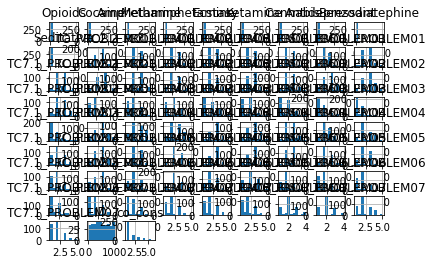

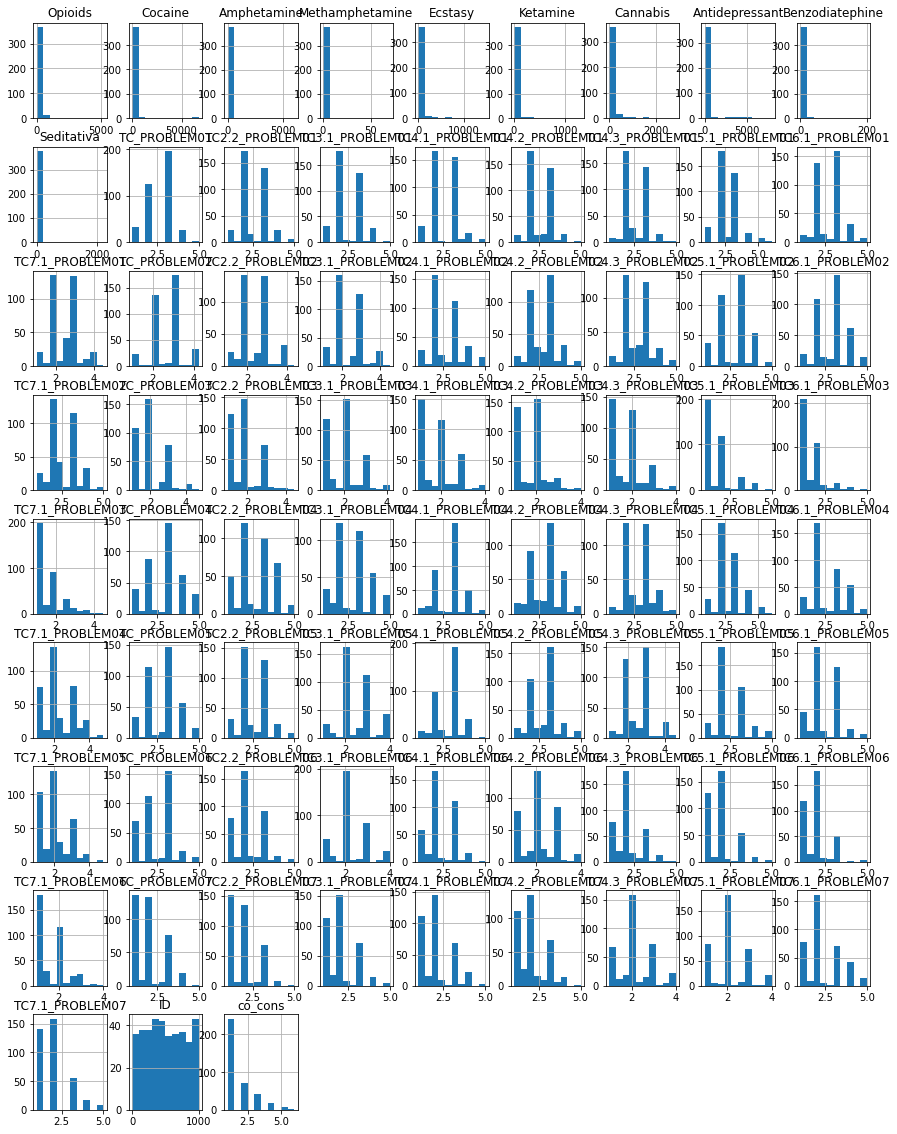

In [24]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

co_consum.hist()
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
co_consum.hist(ax = ax)

pyplot.show()

In [25]:
### make groups of people: non-users, low-user, high-user ###

criteria = [
    (co_consum['co_cons'] >= 3) ,
    (co_consum['co_cons'] >= 0) & (co_consum['co_cons'] <3),
    (co_consum['co_cons'] <= 0)]
choice = ['High', 'Mid', 'Low']
co_consum['User_group'] = np.select(criteria, choice, default='Not Specified')

co_consum['User_group'].value_counts()

Mid     310
High     70
Name: User_group, dtype: int64

In [ ]:
print(co_consum.columns)

In [ ]:
PROB_DRUG = co_consum[['User_group','co_cons','Opioids', 'Cocaine',
       'Cocaine_AlkMix', 'Amphetamine', 'Methamphetamine', 'Ecstasy',
       'other_Psychoactives', 'Ketamine', 'ADHD_Treat', 'Epi_Treat',
       'Antihistamine', 'Cannabis', 'Antidepressant', 'Paracetamol',
       'Benzodiatephine', 'Seditativa', 'Levamisol', 'Drug cons', 'Meds cons',
       'TC_PROBLEM01', 'TC2.2_PROBLEM01', 'TC3.1_PROBLEM01', 'TC4.1_PROBLEM01',
       'TC4.2_PROBLEM01', 'TC4.3_PROBLEM01', 'TC5.1_PROBLEM01',
       'TC6.1_PROBLEM01', 'TC7.1_PROBLEM01', 'TC_PROBLEM02', 'TC2.2_PROBLEM02',
       'TC3.1_PROBLEM02', 'TC4.1_PROBLEM02', 'TC4.2_PROBLEM02',
       'TC4.3_PROBLEM02', 'TC5.1_PROBLEM02', 'TC6.1_PROBLEM02',
       'TC7.1_PROBLEM02', 'TC_PROBLEM03', 'TC2.2_PROBLEM03', 'TC3.1_PROBLEM03',
       'TC4.1_PROBLEM03', 'TC4.2_PROBLEM03', 'TC4.3_PROBLEM03',
       'TC5.1_PROBLEM03', 'TC6.1_PROBLEM03', 'TC7.1_PROBLEM03', 'TC_PROBLEM04',
       'TC2.2_PROBLEM04', 'TC3.1_PROBLEM04', 'TC4.1_PROBLEM04',
       'TC4.2_PROBLEM04', 'TC4.3_PROBLEM04', 'TC5.1_PROBLEM04',
       'TC6.1_PROBLEM04', 'TC7.1_PROBLEM04', 'TC_PROBLEM05', 'TC2.2_PROBLEM05',
       'TC3.1_PROBLEM05', 'TC4.1_PROBLEM05', 'TC4.2_PROBLEM05',
       'TC4.3_PROBLEM05', 'TC5.1_PROBLEM05', 'TC6.1_PROBLEM05',
       'TC7.1_PROBLEM05', 'TC_PROBLEM06', 'TC2.2_PROBLEM06', 'TC3.1_PROBLEM06',
       'TC4.1_PROBLEM06', 'TC4.2_PROBLEM06', 'TC4.3_PROBLEM06',
       'TC5.1_PROBLEM06', 'TC6.1_PROBLEM06', 'TC7.1_PROBLEM06', 'TC_PROBLEM07',
       'TC2.2_PROBLEM07', 'TC3.1_PROBLEM07', 'TC4.1_PROBLEM07',
       'TC4.2_PROBLEM07', 'TC4.3_PROBLEM07', 'TC5.1_PROBLEM07',
       'TC6.1_PROBLEM07', 'TC7.1_PROBLEM07']]
PROB_DRUG.head()

In [ ]:
#PROB_DRUG.to_csv('PROB_DRUG_morebalanced.csv', header=True, index=False) 